In [2]:
!pip install -q tensorflow==2.3.1
!pip install -q tensorflow-quantum

     |████████████████████████████████| 5.9MB 3.8MB/s 
     |████████████████████████████████| 1.6MB 41.3MB/s 
     |████████████████████████████████| 5.6MB 45.6MB/s 


In [17]:
import tensorflow as tf
import tensorflow_quantum as tfq
from tensorflow.keras import datasets, layers, models

import cirq
import sympy
import numpy as np
import seaborn as sns
import collections

# visualization tools
%matplotlib inline
import matplotlib.pyplot as plt
from cirq.contrib.svg import SVGCircuit

In [48]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Rescale the images from [0,255] to the [0.0,1.0] range.
# x_train, x_test = x_train[..., np.newaxis]/255.0, x_test[..., np.newaxis]/255.0
x_train, x_test = x_train[..., np.newaxis], x_test[..., np.newaxis]

print("Number of original training examples:", len(x_train))
print("Number of original test examples:", len(x_test))

print("x_train.shape: ", x_train.shape)
print("x_test.shape: ", x_test.shape)

Number of original training examples: 60000
Number of original test examples: 10000
x_train.shape:  (60000, 28, 28, 1)
x_test.shape:  (10000, 28, 28, 1)


8
<class 'numpy.uint8'>
y_train.shape:  (60000,)
(60000, 28, 28, 1)


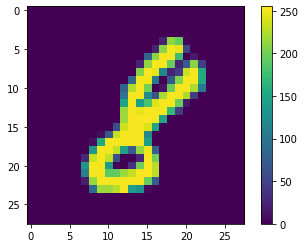

In [49]:
idx = 10001

print(y_train[idx])
print(type(y_train[idx]))
# print(y_train)
print("y_train.shape: ", y_train.shape)

# print(x_train)
print(x_train.shape)
# x_train = x_train.reshape((60000, 28, 28))
plt.imshow(x_train[idx, :, :, 0])
plt.colorbar()

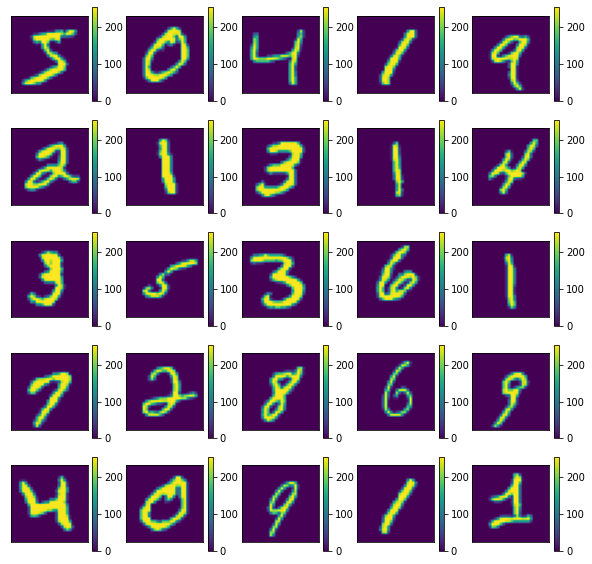

In [51]:
class_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i, :, :, 0])
    plt.colorbar()
plt.show()

In [52]:
model = models.Sequential()
model.add(layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [53]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 64)        16192     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 3, 3, 64)          36928     
Total params: 53,400
Trainable params: 53,400
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [55]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 64)        16192     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)               

In [56]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.2723 - accuracy: 0.9427 - val_loss: 0.0883 - val_accuracy: 0.9712
Epoch 2/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0669 - accuracy: 0.9795 - val_loss: 0.0499 - val_accuracy: 0.9835
Epoch 3/10
1875/1875 [==============================] - 55s 30ms/step - loss: 0.0494 - accuracy: 0.9851 - val_loss: 0.0779 - val_accuracy: 0.9760
Epoch 4/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0421 - accuracy: 0.9867 - val_loss: 0.0436 - val_accuracy: 0.9861
Epoch 5/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0388 - accuracy: 0.9885 - val_loss: 0.0632 - val_accuracy: 0.9841
Epoch 6/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0310 - accuracy: 0.9905 - val_loss: 0.0512 - val_accuracy: 0.9859
Epoch 7/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0278 - accuracy: 0.9915 - val_loss: 0.0565 -

313/313 - 3s - loss: 0.0577 - accuracy: 0.9866


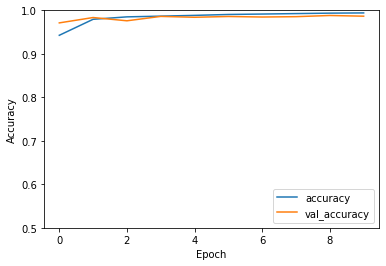

In [59]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

In [60]:
print(test_acc)

0.9865999817848206
